## Get Data

In [285]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [286]:
train_data = pd.read_csv("/Users/user/Desktop/Classification_Scikitlearn/train.csv")

In [287]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [288]:
test_data = pd.read_csv("/Users/user/Desktop/Classification_Scikitlearn/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Tổng quan về dataset

In [289]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [290]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


0    549
1    342
Name: Survived, dtype: int64

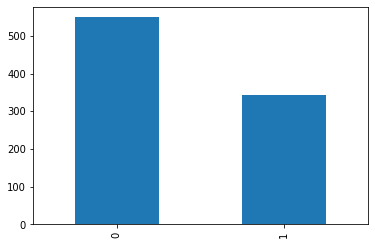

In [291]:
# số người sống sót
train_data["Survived"].value_counts().plot(kind="bar")
train_data["Survived"].value_counts()

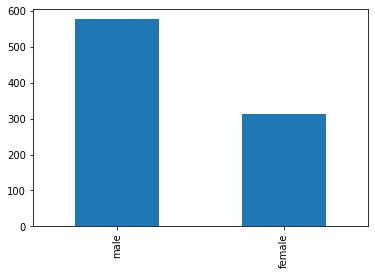

In [292]:
train_data["Sex"].value_counts().plot(kind="bar")

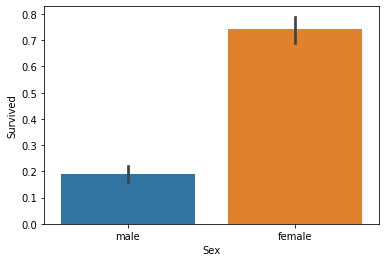

In [293]:
sns.barplot(x='Sex',y='Survived',data = train_data)

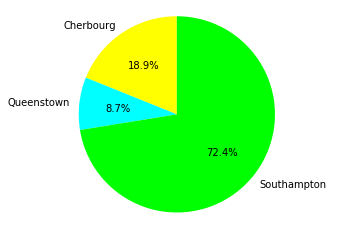

In [294]:
# Số người cập cảng southampton chiếm 72.4%
labels="Cherbourg","Queenstown","Southampton"
sizes=[sum(train_data["Embarked"]=="C"),sum(train_data["Embarked"]=="Q"),sum(train_data["Embarked"]=="S")]
colors=["yellow","aqua","lime"]
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%',startangle=90)
 
plt.axis('equal')
plt.show()

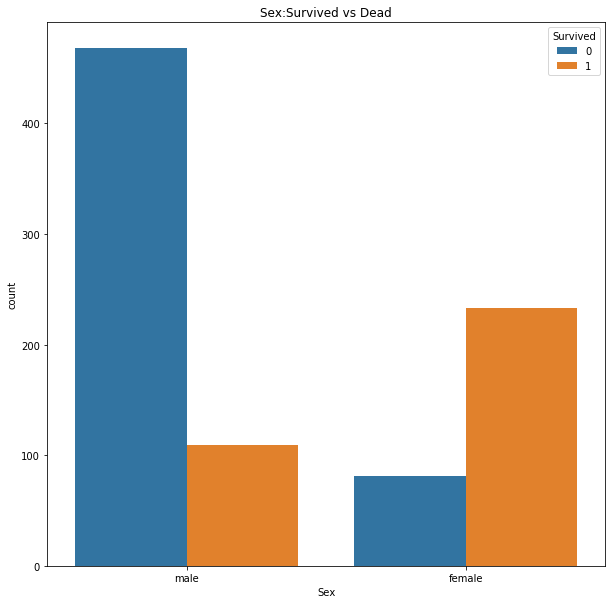

In [295]:
# tỉ lệ sống với giới tính
f,ax = plt.subplots(figsize=(10, 10))
sns.countplot('Sex',hue='Survived',data=train_data,ax=ax)
ax.set_title('Sex:Survived vs Dead')
plt.show()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train_data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train_data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

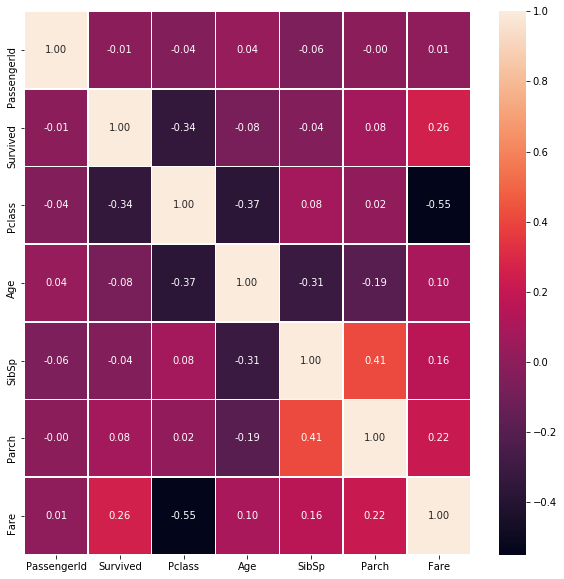

In [296]:
#heat map correlation cho thấy sự tương quan giữa các thuộc tính
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train_data.corr(), annot=True, linewidths=0.5, fmt= '.2f',ax=ax)

### Chuyển Sex sang thuộc tính số

In [297]:
sex_map={"male":1,"female":0}
train_data["Sex"]=train_data["Sex"].map(sex_map)
test_data["Sex"]=test_data["Sex"].map(sex_map)

In [298]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


## Xử lí name

In [299]:
train_data.insert(value=train_data.Name.map(lambda name: name.split(",")[1].split(".")[0].strip()),loc=12,column="Title")


In [300]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,Mr


In [301]:
test_data.insert(value=test_data.Name.map(lambda name: name.split(",")[1].split(".")[0].strip()),loc=11,column="Title")


In [302]:
train_data['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Lady              1
Jonkheer          1
Ms                1
Don               1
Capt              1
Sir               1
Mme               1
the Countess      1
Name: Title, dtype: int64

In [303]:
for t in train_data['Title'].unique():
    if len(train_data[train_data['Title']==t]) <= 15:
        train_data.loc[train_data.Title ==t, 'Title'] = 'OTHER'
       
    


In [304]:
for t in test_data['Title'].unique():
    if len(test_data[test_data['Title']==t]) <= 15:
        test_data.loc[test_data.Title ==t, 'Title'] = 'OTHER'

In [305]:
print(train_data['Title'].unique())
print(test_data['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'OTHER']
['Mr' 'Mrs' 'Miss' 'Master' 'OTHER']


## Xử lí missing values

In [306]:
for i in train_data.columns:
    print (i + ": "+str(sum(train_data[i].isnull()))+" missing values")

PassengerId: 0 missing values
Survived: 0 missing values
Pclass: 0 missing values
Name: 0 missing values
Sex: 0 missing values
Age: 177 missing values
SibSp: 0 missing values
Parch: 0 missing values
Ticket: 0 missing values
Fare: 0 missing values
Cabin: 687 missing values
Embarked: 2 missing values
Title: 0 missing values


In [307]:
for i in test_data.columns:
    print (i + ": "+str(sum(test_data[i].isnull()))+" missing values")

PassengerId: 0 missing values
Pclass: 0 missing values
Name: 0 missing values
Sex: 0 missing values
Age: 86 missing values
SibSp: 0 missing values
Parch: 0 missing values
Ticket: 0 missing values
Fare: 1 missing values
Cabin: 327 missing values
Embarked: 0 missing values
Title: 0 missing values


### Thay những missing values bằng giá trị trung bình đối với Ages

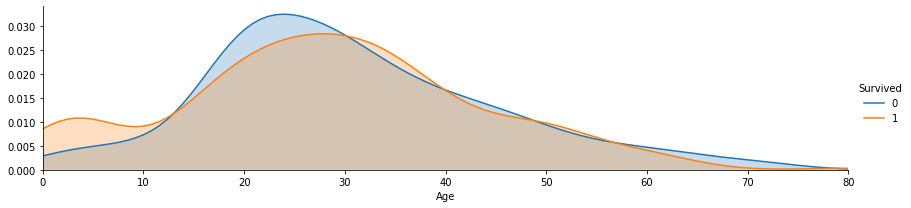

In [308]:
a = sns.FacetGrid(train_data, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , train_data['Age'].max()))
a.add_legend()


In [309]:
# biểu đồ cho ta thấy phân bố khá đều nên thay missing values bằng giá trị means

In [310]:
train_data['Age_After'] =np.where(train_data.Age.isnull(), train_data['Age'].mean(), train_data['Age'])
test_data['Age_After'] =np.where(test_data.Age.isnull(), test_data['Age'].mean(), test_data['Age'])

## Missing values với Embarked và Fare

In [311]:
# Thay Embarked với giá trị xuất hiện nhiều nhất và Fare với giá trị median

In [312]:
train_data['Embarked'] = train_data['Embarked'].fillna("S") 
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

In [313]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_After
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,35.000000
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,OTHER,27.000000
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,Miss,19.000000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,29.699118
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,Mr,26.000000


## Family Size 

In [314]:
train_data["FamilySize"]=train_data["SibSp"]+train_data["Parch"]+1
test_data["FamilySize"]=test_data["SibSp"]+test_data["Parch"]+1

/Users/user/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/user/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/user/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'st

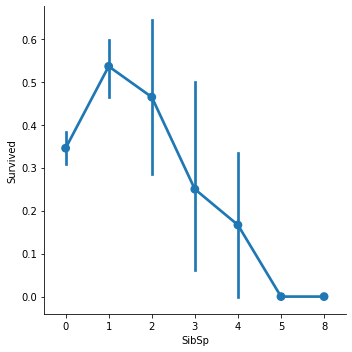

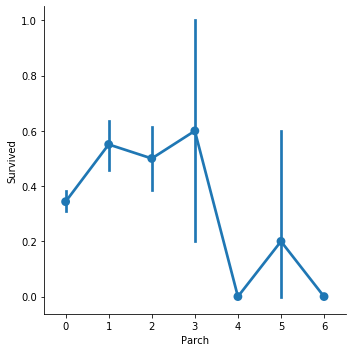

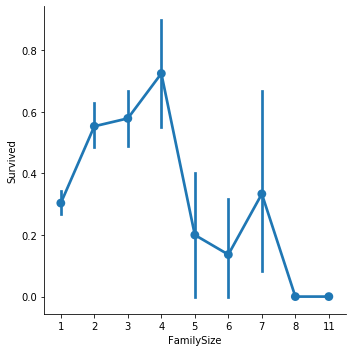

In [315]:
sns.factorplot('SibSp','Survived', data=train_data)
sns.factorplot('Parch','Survived', data=train_data)
sns.factorplot('FamilySize','Survived', data=train_data)

Family Size thể hiện sự ảnh hưởng so với Sibsp Và Parch qua biểu đồ trên

In [316]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_After,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,22.000000,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,38.000000,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,26.000000,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,35.000000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,35.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,OTHER,27.000000,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,Miss,19.000000,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,29.699118,4
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,Mr,26.000000,1


In [317]:
features_drop = ['Name', 'Ticket', 'SibSp', 'Parch','Title','Cabin','PassengerId','Embarked','Age']

In [318]:
train_data = train_data.drop(features_drop, axis=1)
test_data = test_data.drop(features_drop, axis=1)

In [319]:
train_data.head()

,Survived,Pclass,Sex,Fare,Age_After,FamilySize
0,0,3,1,7.2500,22.0,2
1,1,1,0,71.2833,38.0,2
2,1,3,0,7.9250,26.0,1
3,1,1,0,53.1000,35.0,2
4,0,3,1,8.0500,35.0,1


## Modeling And Evaluate using k-fold

In [320]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Fare          891 non-null float64
Age_After     891 non-null float64
FamilySize    891 non-null int64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [321]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
Pclass        418 non-null int64
Sex           418 non-null int64
Fare          418 non-null float64
Age_After     418 non-null float64
FamilySize    418 non-null int64
dtypes: float64(2), int64(3)
memory usage: 16.5 KB


In [322]:
from sklearn.model_selection import train_test_split

In [323]:
x=train_data.drop(["Survived"],axis=1)
y=train_data["Survived"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [324]:
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

## SVM ( RBF kernel)

In [325]:
from sklearn.svm import SVC, LinearSVC
SVC_rbf=SVC(kernel="rbf")
SVC_rbf.fit(x_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [326]:
# accuracy
from sklearn.model_selection import cross_val_score
def Accuracy(model):
    print("Accuracy:",np.mean(cross_val_score(model,x_test,y_test,cv=k_fold,scoring="accuracy")))
Accuracy(SVC_rbf)    

Accuracy: 0.7087301587301587


In [327]:
predictions = SVC_rbf.predict(test_data)

In [328]:
#predictions

In [329]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,SVC_rbf.predict(x_test),labels=[0,1])

In [330]:
def confusion_matrix_table(model_used):
    cm=confusion_matrix(y_test,model_used.predict(x_test))
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Dead","Predicted Survived"]
    cm.index=["Actual Dead","Actual Survived"]
    return cm

In [331]:
confusion_matrix_table(SVC_rbf)

,Predicted Dead,Predicted Survived
Actual Dead,104,6
Actual Survived,44,25


In [332]:
def confusion_matrix_model(model_used):
    cm=confusion_matrix(y_test,model_used.predict(x_test))
    col=["Predicted Dead","Predicted Survived"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Dead","Predicted Survived"]
    cm.index=["Actual Dead","Actual Survived"]
    cm['Recall']=np.around(cm['Predicted Dead'].div(cm[col].sum(axis=1),axis=0),decimals=2)
    cm[col]=np.around(cm[col].div(cm[col].sum(axis=1),axis=0),decimals=2)
    return cm

In [333]:
confusion_matrix_model(SVC_rbf)

,Predicted Dead,Predicted Survived,Recall
Actual Dead,0.95,0.05,0.95
Actual Survived,0.64,0.36,0.64


In [334]:
from sklearn import metrics
def Precision(model_used):
    print("Precision:",metrics.precision_score(y_test, model_used.predict(x_test), average=None))
Precision(SVC_rbf)

Precision: [0.7027027  0.80645161]


In [335]:
def Recall(model_used):
    print("Recall:",metrics.recall_score(y_test, model_used.predict(x_test),average=None))
Recall(SVC_rbf)
    

Recall: [0.94545455 0.36231884]


In [336]:
def F1(model):
    print("F1:",metrics.f1_score(y_test, model.predict(x_test),average=None))
F1(SVC_rbf)
    

F1: [0.80620155 0.5       ]


In [337]:
# fpr, tpr, thresholds = metrics.roc_curve(y_test, SVC_rbf.predict(x_test))
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.plot(fpr, tpr, color='darkorange',
#          lw=2, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.title('ROC curve')
# plt.xlabel('False Positive Rate (1 - Specificity)')
# plt.ylabel('True Positive Rate (Sensitivity)')
# plt.legend(loc="lower right")
# plt.grid(True)

In [338]:
import scikitplot as skplt
def aucscore(model,has_proba=True):
    
    if has_proba:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.predict_proba(x_test)[:,1])
    else:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.predicts(x_test))
    x=fpr
    y=tpr
    auc= skplt.metrics.auc(x,y)
    return auc
def plt_roc_curve(name,model,has_proba):
    if has_proba:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.predict_proba(x_test)[:,1])
    else:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.decision_function(x_test))
    x=fpr
    y=tpr
    auc= skplt.metrics.auc(x,y)
    plt.plot(x,y,label='ROC curve for %s (AUC = %0.2f)' % (name, auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

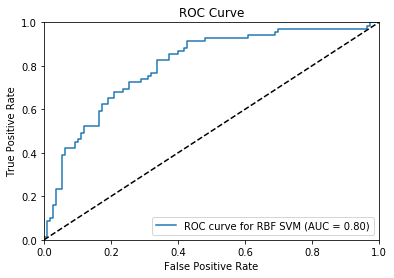

In [339]:
plt_roc_curve("RBF SVM",SVC_rbf,has_proba=False)

## KNN


In [340]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [341]:
print("Accuracy:",np.mean(cross_val_score(KNN,x_test,y_test,cv=k_fold,scoring="accuracy")))

Accuracy: 0.7646031746031746


In [342]:
confusion_matrix_table(KNN)

,Predicted Dead,Predicted Survived
Actual Dead,91,19
Actual Survived,27,42


In [343]:
confusion_matrix_model(KNN)

,Predicted Dead,Predicted Survived,Recall
Actual Dead,0.83,0.17,0.83
Actual Survived,0.39,0.61,0.39


In [344]:
Precision(KNN)

Precision: [0.77118644 0.68852459]


In [345]:
Recall(KNN)

Recall: [0.82727273 0.60869565]


In [346]:
F1(KNN)

F1: [0.79824561 0.64615385]


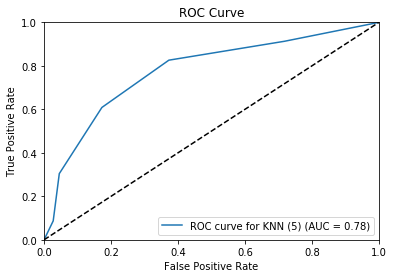

In [347]:
plt_roc_curve("KNN (5)",KNN,has_proba=True)


## Random Forest

In [348]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
ranforclf = RandomForestClassifier(n_estimators=50, max_features='sqrt',max_depth=6,random_state=10)
ranforclf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [349]:
Accuracy(ranforclf)

Accuracy: 0.8546031746031746


In [350]:
confusion_matrix_table(ranforclf)

,Predicted Dead,Predicted Survived
Actual Dead,103,7
Actual Survived,22,47


In [351]:
confusion_matrix_model(ranforclf)

,Predicted Dead,Predicted Survived,Recall
Actual Dead,0.94,0.06,0.94
Actual Survived,0.32,0.68,0.32


In [352]:
Recall(ranforclf)

Recall: [0.93636364 0.68115942]


In [353]:
Precision(ranforclf)

Precision: [0.824      0.87037037]


In [354]:
F1(ranforclf)

F1: [0.87659574 0.76422764]


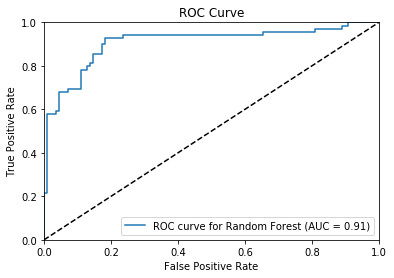

In [355]:
plt_roc_curve("Random Forest",ranforclf,has_proba=True)

## Decision Tree

In [356]:
tree=DecisionTreeClassifier(max_depth=4,random_state=5)
tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

In [357]:
Accuracy(tree)

Accuracy: 0.8261904761904761


In [358]:
confusion_matrix_table(tree)

,Predicted Dead,Predicted Survived
Actual Dead,99,11
Actual Survived,22,47


In [359]:
confusion_matrix_model(tree)

,Predicted Dead,Predicted Survived,Recall
Actual Dead,0.90,0.10,0.90
Actual Survived,0.32,0.68,0.32


In [360]:
Recall(tree)

Recall: [0.9        0.68115942]


In [361]:
Precision(tree)

Precision: [0.81818182 0.81034483]


In [362]:
F1(tree)

F1: [0.85714286 0.74015748]


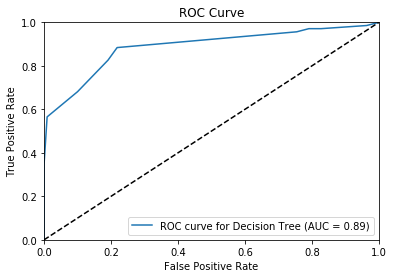

In [363]:
plt_roc_curve("Decision Tree",tree,has_proba=True)


## Linear kernel

In [364]:
SVC_lin=SVC(kernel="linear")
SVC_lin.fit(x_train,y_train)

Accuracy(SVC_lin)

Accuracy: 0.7596825396825397


In [365]:
confusion_matrix_table(SVC_lin)

,Predicted Dead,Predicted Survived
Actual Dead,92,18
Actual Survived,20,49


In [366]:
confusion_matrix_model(SVC_lin)

,Predicted Dead,Predicted Survived,Recall
Actual Dead,0.84,0.16,0.84
Actual Survived,0.29,0.71,0.29


In [367]:
Recall(SVC_lin)

Recall: [0.83636364 0.71014493]


In [368]:
Precision(SVC_lin)

Precision: [0.82142857 0.73134328]


In [369]:
F1(SVC_lin)

F1: [0.82882883 0.72058824]


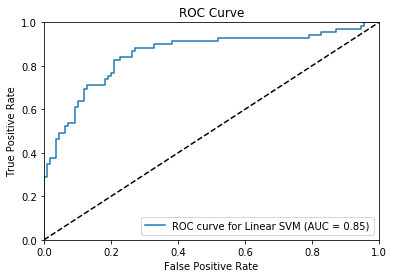

In [370]:
plt_roc_curve("Linear SVM",SVC_lin,has_proba=False)